In [169]:
# import dependencies
import quandl
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')
from config import API_key

In [170]:
oil_prices = quandl.get("OPEC/ORB", authtoken= API_key)
oil_prices.head()

,Value
Date,
2003-01-02,30.05
2003-01-03,30.83
2003-01-06,30.71
2003-01-07,29.72
2003-01-08,28.86


In [171]:
oil_prices_df=oil_prices.reset_index()


In [172]:
# Filter data for 15 years
filtered_oil_prices = oil_prices_df.loc[(oil_prices_df['Date'] >= '2006-01-01') ]
filtered_oil_prices.head()

,Date,Value
775,2006-01-03,55.60
776,2006-01-04,56.38
777,2006-01-05,56.61
778,2006-01-06,56.78
779,2006-01-09,57.29


In [173]:
# filtered_oil_prices =filtered_oil_prices.set_index('Date')
# filtered_oil_prices.tail()

In [101]:
filtered_oil_prices.shape

(3917, 2)

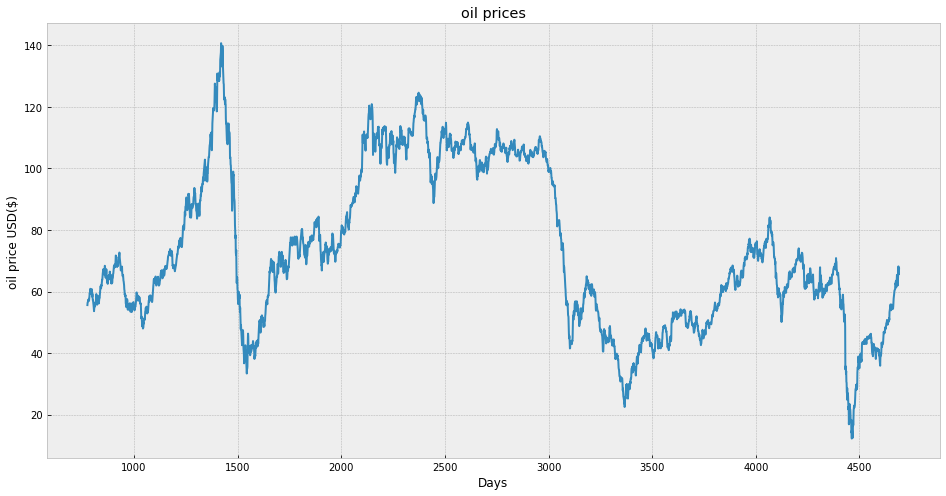

In [102]:
# visualize the price data
plt.figure(figsize=(16,8))
plt.title('oil prices')
plt.ylabel('oil price USD($)')
plt.xlabel('Days')
plt.plot(filtered_oil_prices.Value)
plt.show()

In [103]:
# get the oil price
filtered_oil_prices_df = filtered_oil_prices[['Value']]
filtered_oil_prices_df.head(4)

,Value
775,55.60
776,56.38
777,56.61
778,56.78


In [160]:
#create a variable to predict x days into future
future_days = 100
#create a new column(target) SHIFTED X UNITS / DAYS up

In [161]:
filtered_oil_prices_df['Prediction'] = filtered_oil_prices_df[['Value']].shift(-future_days)
filtered_oil_prices_df.tail()

,Value,Prediction
4687,67.03,NaN
4688,68.17,NaN
4689,66.38,NaN
4690,65.60,NaN
4691,67.39,NaN


In [162]:
#create the feature data set(x) and covert it to a numpy array and remove the last'x' rows/days

X = np.array(filtered_oil_prices_df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[55.6 ]
 [56.38]
 [56.61]
 ...
 [41.37]
 [41.38]
 [41.04]]


In [163]:
#create the target data set "y" and convert to a numpy array and get all of the target 
#values except the last'x' rows /days

y = np.array(filtered_oil_prices_df['Prediction'])[:-future_days]
print(y)

[64.48 63.91 65.1  ... 66.38 65.6  67.39]


In [164]:
#split data into 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [165]:
# create the models
#create the decision tree regressor model
tree = DecisionTreeRegressor().fit(X_train, y_train)

#create the linear regression model
lr = LinearRegression().fit(X_train, y_train)

In [176]:
#get the last 'x' rows of the feature data set

x_future = filtered_oil_prices_df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

x_future

array([[35.47],
       [34.85],
       [36.84],
       [38.89],
       [37.1 ],
       [37.46],
       [36.56],
       [35.06],
       [35.09],
       [36.75],
       [37.59],
       [37.7 ],
       [39.45],
       [38.96],
       [39.85],
       [38.17],
       [37.18],
       [37.99],
       [37.34],
       [38.22],
       [42.69],
       [42.93],
       [42.96],
       [43.57],
       [43.15],
       [43.44],
       [43.31],
       [43.47],
       [43.38],
       [43.02],
       [44.12],
       [43.8 ],
       [43.22],
       [43.03],
       [44.29],
       [44.24],
       [44.62],
       [43.38],
       [43.14],
       [43.4 ],
       [43.59],
       [42.99],
       [43.02],
       [44.02],
       [44.27],
       [45.34],
       [45.17],
       [44.87],
       [45.01],
       [45.21],
       [45.08],
       [45.34],
       [44.62],
       [44.94],
       [45.49],
       [45.19],
       [45.05],
       [44.92],
       [45.19],
       [45.87],
       [46.05],
       [45.81],
       [

In [167]:
# show the modl tree prediction

tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
# show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[58.75       40.91       41.05       38.46       39.53       38.42
 37.12       40.62       35.89       38.44       39.79       39.79
 44.53       48.855      41.72       43.42       39.53       42.05
 42.93       52.11       43.05       50.04       60.3        44.75
 57.26       40.825      46.66       56.3        48.005      53.11
 46.69       47.46       46.11       47.77       47.79       48.31
 49.81       48.005      54.63       49.61       50.12       60.3
 53.11       48.81       47.79       51.75333333 50.31       50.1
 50.16       32.42       61.64       51.75333333 49.81       53.29
 55.695      39.83       44.595      45.23       39.83       55.19
 54.68       53.92       51.75333333 49.29       55.14       53.02
 51.25       54.87       61.49       70.18       54.41       55.14
 56.82       48.855      58.26       63.555      52.13       60.3
 60.47       61.11333333 60.79       67.03       58.255      62.5
 52.51       25.69       41.72       63.73       64.         66.92

<ipython-input-174-30e4570b60ca>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predictions


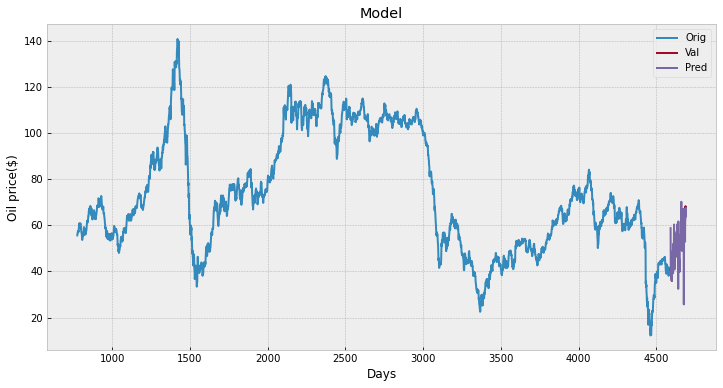

In [174]:
# visualize the data

predictions = tree_prediction

valid = filtered_oil_prices_df[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(12, 6))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Oil price($)')
plt.plot(filtered_oil_prices_df['Value'])
plt.plot(valid[['Value','Prediction']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()